In [0]:
! wget 'https://github.com/adobe-research/deft_corpus/archive/master.zip'
! unzip master.zip
! mkdir trainingFiles
! mkdir testingFiles

--2020-01-19 11:49:58--  https://github.com/adobe-research/deft_corpus/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adobe-research/deft_corpus/zip/master [following]
--2020-01-19 11:49:58--  https://codeload.github.com/adobe-research/deft_corpus/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [       <=>          ]   6.95M  5.41MB/s    in 1.3s    

2020-01-19 11:50:00 (5.41 MB/s) - ‘master.zip’ saved [7286280]

Archive:  master.zip
03a42bc5f263bca27145ff724bf1967f02309419
   creating: deft_corpus-master/
   creating: deft_corpus-master/.github/
   creatin

In [0]:
! ls

deft_corpus-master  master.zip	sample_data  testingFiles  trainingFiles


In [0]:
! python3 deft_corpus-master/task1_converter.py deft_corpus-master/data/deft_files/train trainingFiles
! python3 deft_corpus-master/task1_converter.py deft_corpus-master/data/deft_files/dev testingFiles

In [0]:
# testing...
! head trainingFiles/task_1_t1_biology_0_0.deft

" 5 . Science includes such diverse fields as astronomy , biology , computer sciences , geology , logic , physics , chemistry , and mathematics ( [ link ] ) ."	"0"
" However , those fields of science related to the physical world and its phenomena and processes are considered natural sciences ."	"1"
" Thus , a museum of natural sciences might contain any of the items listed above ."	"0"
" 8 . In deductive reason , the pattern of thinking moves in the opposite direction as compared to inductive reasoning ."	"0"
" Deductive reasoning is a form of logical thinking that uses a general principle or law to forecast specific results ."	"1"
" From those general principles , a scientist can extrapolate and predict the specific results that would be valid as long as the general principles are valid ."	"0"
" 11 . Each experiment will have one or more variables and one or more controls ."	"0"
" A variable is any part of the experiment that can vary or change during the experiment ."	"1"
" The cont

In [0]:
%load_ext cython
import os
import io
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
import nltk
import re
from nltk.stem import WordNetLemmatizer
import time
import multiprocessing
from gensim.models import word2vec
from bs4 import BeautifulSoup
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt; 
plt.rcdefaults()

import statistics

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words('english'))

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

def text_processing(text):
    text = text.lower() 
    
    #Split into individual words on whitespace and remove punctuation
    words = tokenizer.tokenize(text)
    # words = words.split()
    
    words = [lemmatizer.lemmatize(w) for w in words]   
    
    return ' '.join(words)

In [0]:
def readFiles(directoryName, process):
    tempDataFrames = []
    for root, dirs, files in os.walk(directoryName):
        for name in files:
            path = os.path.join(root, name)
            
            # Data is a panda dataframe
            data = pd.read_csv(path, sep="\t")
            data.columns = ["text", "classifier"]
            if process:
                data["text"] = data["text"].apply(text_processing)

            tempDataFrames.append(data)
    return pd.concat(tempDataFrames, axis=0, ignore_index=False)

In [0]:
trainingFrame = readFiles("trainingFiles", False)
testingFrame = readFiles("testingFiles", False)
trainingFrame.head()

,text,classifier
0,A horizon is a soil layer with distinct physi...,1
1,Five factors account for soil formation : par...,0
2,1219 . Animals and microorganisms can produce...,0
3,Plant secretions promote the development of m...,1
4,"Additionally , leaves and other material that...",0


In [0]:
# trainingFrame, validationFrame = train_test_split(trainingFrame, test_size=0.1)

In [0]:
trainingFrame.reset_index(inplace=True)
trainingFrame.sort_index(inplace=True)

testingFrame.reset_index(inplace=True)
testingFrame.sort_index(inplace=True)

# validationFrame.reset_index(inplace=True)
# validationFrame.sort_index(inplace=True)

In [0]:
trainingFrame

,index,text,classifier
0,0,A horizon is a soil layer with distinct physi...,1
1,1,Five factors account for soil formation : par...,0
2,2,1219 . Animals and microorganisms can produce...,0
3,3,Plant secretions promote the development of m...,1
4,4,"Additionally , leaves and other material that...",0
...,...,...,...
17285,167,Even though CDOs consisted of subprime mortga...,1
17286,168,"2633 . In the 1990s , the idea of legal , sam...",0
17287,169,"Things began to change , however , following ...",0
17288,170,Although it was the intention of the state to...,0


In [0]:
len(testingFrame)

782

In [0]:
print(len(trainingFrame[trainingFrame.classifier==0]))
print(len(trainingFrame[trainingFrame.classifier==1]))
print(len(testingFrame[testingFrame.classifier==0]))
print(len(testingFrame[testingFrame.classifier==1]))

11725
5565
531
251


In [0]:
trainingFrame_classifiers = trainingFrame["classifier"]
trainingFrame_text = trainingFrame["text"]

testingFrame_classifiers = testingFrame["classifier"]
testingFrame_text = testingFrame["text"]

testingFrame_classifiers = testingFrame_classifiers.to_numpy('int')
trainingFrame_classifiers = trainingFrame_classifiers.to_numpy('int')

In [0]:
# max_features = 30000
cvnoignore = CountVectorizer(analyzer='word')
#cvnoignore=CountVectorizer(min_df=1,stop_words='english', analyzer='word')
cvignore = TfidfVectorizer(min_df=1,stop_words='english', analyzer='word')
#cvignore=TfidfVectorizer()

In [0]:
training_cvnoignore=cvnoignore.fit_transform(trainingFrame_text)
training_cvignore=cvignore.fit_transform(trainingFrame_text)

In [0]:
mnbnoignore=MultinomialNB()
mnbignore=MultinomialNB()

In [0]:
mnbnoignore.fit(training_cvnoignore,trainingFrame_classifiers)
mnbignore.fit(training_cvignore,trainingFrame_classifiers)
testing_cvnoignore=cvnoignore.transform(testingFrame_text)
testing_cvignore=cvignore.transform(testingFrame_text)

prednoignore=mnbnoignore.predict(testing_cvnoignore)
predignore=mnbignore.predict(testing_cvignore)
print(accuracy_score(testingFrame_classifiers, prednoignore))
print(f1_score(testingFrame_classifiers,prednoignore,average='macro'))
print(f1_score(testingFrame_classifiers,predignore,average='macro'))
print(f1_score(testingFrame_classifiers,prednoignore,average='micro'))
print(f1_score(testingFrame_classifiers,predignore,average='micro'))
print(f1_score(testingFrame_classifiers,prednoignore,average='binary'))
print(f1_score(testingFrame_classifiers,predignore,average='binary'))
print(f1_score(testingFrame_classifiers,prednoignore,pos_label=1))
print(f1_score(testingFrame_classifiers,predignore,pos_label=1))

0.7583120204603581
0.7200811359026369
0.5725602605194479
0.7583120204603581
0.7276214833759591
0.6166328600405679
0.315112540192926
0.6166328600405679
0.315112540192926


In [0]:
print (len(prednoignore))
a=training_cvignore.toarray()
print(len(a[0]))
b=training_cvnoignore.toarray()
print(len(b[0]))

782
26841
27125


In [0]:
sentences = [sent.split() for sent in trainingFrame_text]

In [0]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

num_features = 300    # Word vector dimensionality                      
min_word_count = 1   # Minimum word count                        
cores = multiprocessing.cpu_count()       # Number of threads to run in parallel
context = 5         # Context window size                                                                                    

model = word2vec.Word2Vec(sentences, workers=cores - 1, \
            size=num_features, min_count = min_word_count, \
            window = context, iter=6)

model.train(sentences=sentences, total_examples=len(sentences), epochs=10)

model.init_sims(replace=True)

In [0]:
model.wv.vectors.shape

(30912, 300)

In [0]:
numWords = 0
sentenceSize = []
def getVecForSent(sent, vocab_set):
    global numWords, sentenceSize
    vec = np.zeros(num_features, dtype="float32")
    num_words_in_sent = 0
    # sent = sent.split(' ')
    newsent = sent.split(' ')
    for word in newsent:
        if word in vocab_set:
            vec = np.add(vec, model[word])
            num_words_in_sent += 1

    
    numWords += num_words_in_sent
    sentenceSize.append(num_words_in_sent)

    if num_words_in_sent == 0:
        return vec
    
    vec = np.divide(vec, num_words_in_sent)
    return vec

def getAverageFeatureVectors(df):
    global numWords, sentenceSize
    vocab_set = set(model.wv.index2word)
    numWords = 0
    sentenceSize = []
    
    featureVecs = np.zeros((len(df), num_features),dtype="float32")

    for i, sent in enumerate(df):
        vec = getVecForSent(sent, vocab_set)
        featureVecs[i] = vec

    print('\n\n*********************************************')
    print('Average word size of sentence ', numWords // len(df))
    print('Standard deviation : ' , statistics.stdev(sentenceSize))
    print('*********************************************')

    
    return featureVecs


trainingFeatureVecs = getAverageFeatureVectors(trainingFrame_text)
testingFeatureVecs = getAverageFeatureVectors(testingFrame_text)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()




*********************************************
Average word size of sentence  26
Standard deviation :  12.908541369472127
*********************************************


*********************************************
Average word size of sentence  24
Standard deviation :  12.198288827741967
*********************************************


In [0]:
len(trainingFrame_text)

17290

In [0]:
print(len(model.wv.vocab))
l = set([w for s in sentences for w in s])
print(len(l))

30912
30912


In [0]:
list(model.wv.vocab)[0:20]

['A',
 'horizon',
 'is',
 'a',
 'soil',
 'layer',
 'with',
 'distinct',
 'physical',
 'and',
 'chemical',
 'properties',
 'that',
 'differ',
 'from',
 'those',
 'of',
 'other',
 'layers',
 '.']

In [0]:
model.most_similar('correct')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('finding', 0.8988226056098938),
 ('reference', 0.8896781206130981),
 ('task', 0.8659782409667969),
 ('advantage', 0.8649898767471313),
 ('answer', 0.8622455596923828),
 ('appears', 0.8535652756690979),
 ('validity', 0.8529783487319946),
 ('fraction', 0.8520983457565308),
 ('application', 0.8506165742874146),
 ('completion', 0.8503789305686951)]

In [0]:
def printInfo(prediction, actual, typeStr):
    sz = len(prediction)
    assert(len(prediction) == len(actual))

    tp = fp = tn = fn = 0
    for i in range(sz):
        if actual[i] == 1:
            if prediction[i] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if prediction[i] == 0:
                tn += 1
            else:
                fn += 1
    print("Total size", sz)
    print("True positive", tp)
    print("True negative", tn)
    print("False positive", fp)
    print("False negative", fn, '\n\n')

    objects = ('TP', 'TN', 'FP', 'FN')
    y_pos = np.arange(len(objects))
    performance = [tp, tn, fp, fn]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    title = 'Confusion matrix ' + typeStr
    plt.title(title)
    plt.show()

# printInfo(result, testingFrame_classifiers, 'KNN')

Total size 782
True positive 152
True negative 441
False positive 99
False negative 90 




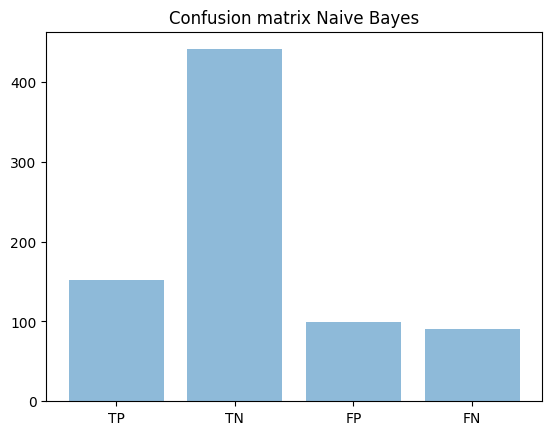

In [0]:
printInfo(prednoignore, testingFrame_classifiers, 'Naive Bayes')

                  precision    recall  f1-score   support

not a definition       0.74      0.92      0.82       531
 is a definition       0.65      0.33      0.43       251

        accuracy                           0.73       782
       macro avg       0.69      0.62      0.63       782
    weighted avg       0.71      0.73      0.70       782



total f1 score 0.4338624338624339
total accuracy 0.7263427109974424 


Total size 782
True positive 82
True negative 486
False positive 169
False negative 45 




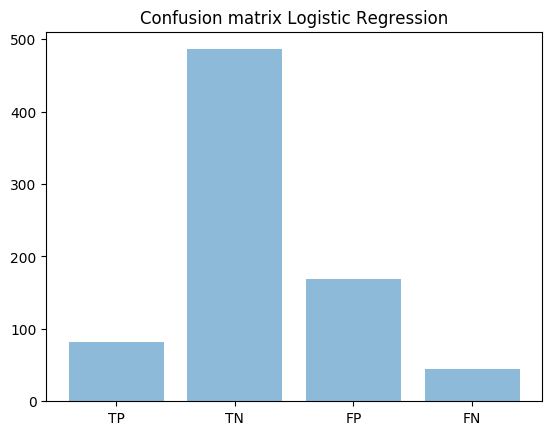

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

target_names = ['not a definition', 'is a definition']

forest = LogisticRegression().fit( trainingFeatureVecs, trainingFrame_classifiers)

result = forest.predict( testingFeatureVecs )

print(classification_report(testingFrame_classifiers, result, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, result, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, result), '\n\n')

printInfo(result, testingFrame_classifiers, 'Logistic Regression')

                  precision    recall  f1-score   support

not a definition       0.75      0.87      0.80       531
 is a definition       0.58      0.37      0.45       251

        accuracy                           0.71       782
       macro avg       0.66      0.62      0.63       782
    weighted avg       0.69      0.71      0.69       782



total f1 score 0.45255474452554745
total accuracy 0.7122762148337596 


Total size 782
True positive 93
True negative 464
False positive 158
False negative 67 




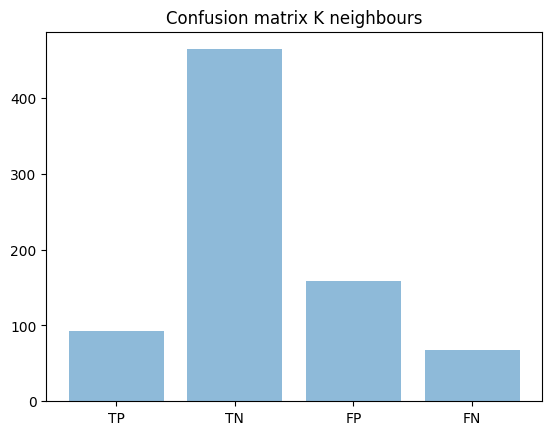

In [0]:
classifier_model = KNeighborsClassifier(n_neighbors=20)

clf = classifier_model.fit( trainingFeatureVecs, trainingFrame_classifiers )

result = clf.predict( testingFeatureVecs )


print(classification_report(testingFrame_classifiers, result, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, result, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, result), '\n\n')

printInfo(result, testingFrame_classifiers, 'K neighbours')

                  precision    recall  f1-score   support

not a definition       0.77      0.73      0.75       531
 is a definition       0.49      0.53      0.51       251

        accuracy                           0.67       782
       macro avg       0.63      0.63      0.63       782
    weighted avg       0.68      0.67      0.67       782



total f1 score 0.5095057034220531
total accuracy 0.670076726342711 


Total size 782
True positive 134
True negative 390
False positive 117
False negative 141 




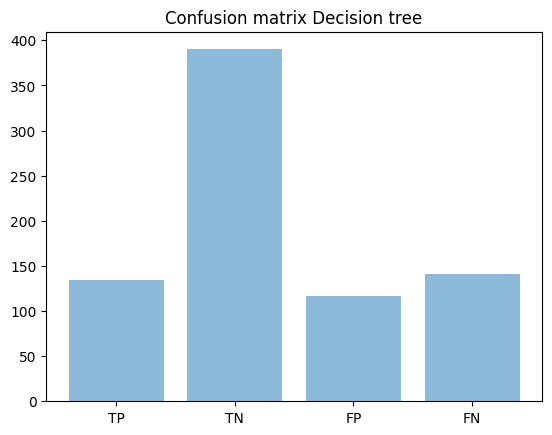

In [0]:

classifier_model = DecisionTreeClassifier()

clf = classifier_model.fit( trainingFeatureVecs, trainingFrame_classifiers )

result = clf.predict( testingFeatureVecs )

print(classification_report(testingFrame_classifiers, result, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, result, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, result), '\n\n')


printInfo(result, testingFrame_classifiers, 'Decision tree')

                  precision    recall  f1-score   support

not a definition       0.78      0.92      0.84       531
 is a definition       0.73      0.45      0.56       251

        accuracy                           0.77       782
       macro avg       0.75      0.69      0.70       782
    weighted avg       0.76      0.77      0.75       782



total f1 score 0.5566502463054186
total accuracy 0.7698209718670077 


Total size 782
True positive 113
True negative 489
False positive 138
False negative 42 




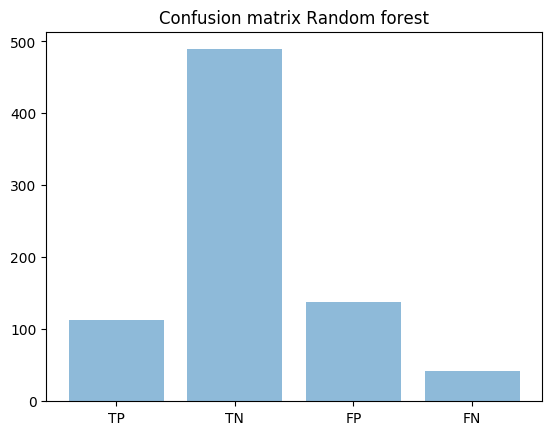

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier_model = RandomForestClassifier()

clf = classifier_model.fit( trainingFeatureVecs, trainingFrame_classifiers)

result = clf.predict( testingFeatureVecs )

print(classification_report(testingFrame_classifiers, result, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, result, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, result), '\n\n')


printInfo(result, testingFrame_classifiers, 'Random forest')

In [0]:
# from sklearn.neural_network import MLPClassifier

# clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000, alpha=0.0001,
#                      solver='sgd',  verbose=True, random_state=21,tol=0.00001)

# clf.fit(trainingFeatureVecs, trainingFrame_classifiers)

# result = clf.predict( testingFeatureVecs )
# print(f1_score(testingFrame_classifiers, result, average='binary'))
# print(accuracy_score(testingFrame_classifiers, result))
# printInfo(result, testingFrame_classifiers, 'MLP')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7941176470588235
0.653763440860215
                  precision    recall  f1-score   support

not a definition       0.83      0.88      0.85       531
 is a definition       0.71      0.61      0.65       251

        accuracy                           0.79       782
       macro avg       0.77      0.74      0.75       782
    weighted avg       0.79      0.79      0.79       782



total f1 score 0.653763440860215
total accuracy 0.7941176470588235 


Total size 782
True positive 152
True negative 469
False positive 99
False negative 62 




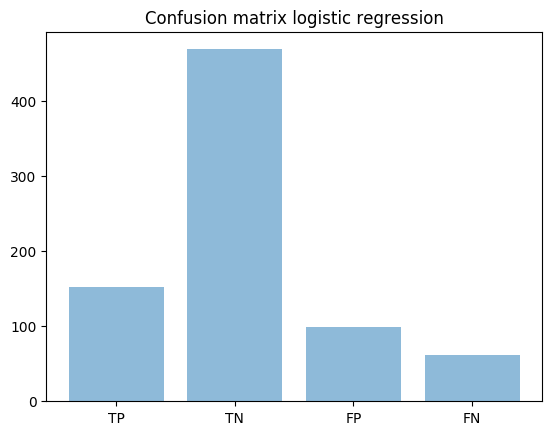

In [0]:
mnbnoignore=LogisticRegression()
mnbnoignore.fit(training_cvnoignore,trainingFrame_classifiers)
testing_cvnoignore=cvnoignore.transform(testingFrame_text)
prednoignore=mnbnoignore.predict(testing_cvnoignore)
print(accuracy_score(testingFrame_classifiers, prednoignore))
print(f1_score(testingFrame_classifiers,prednoignore,average='binary'))
print(classification_report(testingFrame_classifiers, prednoignore, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, prednoignore, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, prednoignore), '\n\n')
printInfo(prednoignore, testingFrame_classifiers, 'logistic regression')

0.7736572890025576
0.6242038216560509
                  precision    recall  f1-score   support

not a definition       0.81      0.86      0.84       531
 is a definition       0.67      0.59      0.62       251

        accuracy                           0.77       782
       macro avg       0.74      0.72      0.73       782
    weighted avg       0.77      0.77      0.77       782



total f1 score 0.6242038216560509
total accuracy 0.7736572890025576 


Total size 782
True positive 147
True negative 458
False positive 104
False negative 73 




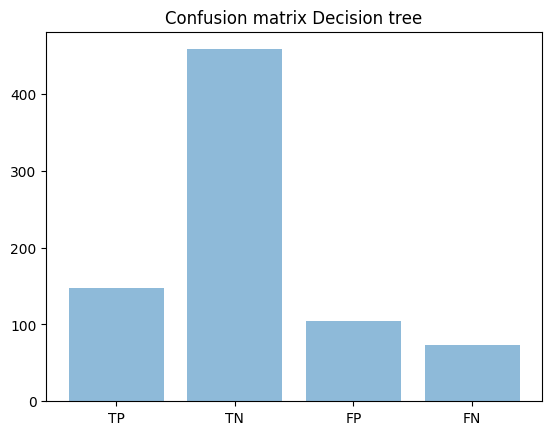

In [0]:
mnbnoignore=DecisionTreeClassifier()
mnbnoignore.fit(training_cvnoignore,trainingFrame_classifiers)
testing_cvnoignore=cvnoignore.transform(testingFrame_text)
prednoignore=mnbnoignore.predict(testing_cvnoignore)
print(accuracy_score(testingFrame_classifiers, prednoignore))
print(f1_score(testingFrame_classifiers,prednoignore,average='binary'))
print(classification_report(testingFrame_classifiers, prednoignore, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, prednoignore, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, prednoignore), '\n\n')
printInfo(prednoignore, testingFrame_classifiers, 'Decision tree')

0.789002557544757
0.56
                  precision    recall  f1-score   support

not a definition       0.78      0.96      0.86       531
 is a definition       0.85      0.42      0.56       251

        accuracy                           0.79       782
       macro avg       0.81      0.69      0.71       782
    weighted avg       0.80      0.79      0.76       782



total f1 score 0.56
total accuracy 0.789002557544757 


Total size 782
True positive 105
True negative 512
False positive 146
False negative 19 




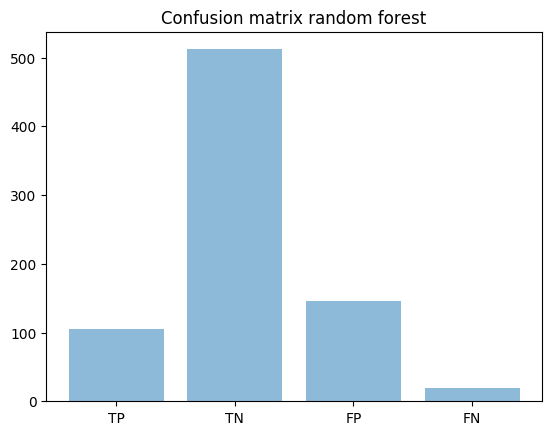

[[512  19]
 [146 105]]


In [0]:
from sklearn import metrics
mnbnoignore=RandomForestClassifier()
mnbnoignore.fit(training_cvnoignore,trainingFrame_classifiers)
testing_cvnoignore=cvnoignore.transform(testingFrame_text)
prednoignore=mnbnoignore.predict(testing_cvnoignore)
print(accuracy_score(testingFrame_classifiers, prednoignore))
print(f1_score(testingFrame_classifiers,prednoignore,average='binary'))
print(classification_report(testingFrame_classifiers, prednoignore, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, prednoignore, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, prednoignore), '\n\n')
printInfo(prednoignore, testingFrame_classifiers, 'random forest')
print(metrics.confusion_matrix(testingFrame_classifiers, prednoignore))

In [0]:
mnbnoignore=KNeighborsClassifier(n_neighbors=20)
mnbnoignore.fit(training_cvnoignore,trainingFrame_classifiers)
testing_cvnoignore=cvnoignore.transform(testingFrame_text)
prednoignore=mnbnoignore.predict(testing_cvnoignore)
print(accuracy_score(testingFrame_classifiers, prednoignore))
print(f1_score(testingFrame_classifiers,prednoignore,average='binary'))
print(classification_report(testingFrame_classifiers, prednoignore, target_names=target_names))
print('\n\ntotal f1 score', f1_score(testingFrame_classifiers, prednoignore, average='binary'))
print('total accuracy', accuracy_score(testingFrame_classifiers, prednoignore), '\n\n')
printInfo(prednoignore, testingFrame_classifiers, 'knn')

In [0]:
# f1_score(testingFrame_classifiers, result, average='binary')
len(testingFeatureVecs)

In [0]:
# print(testingFeatureVecs)
# print(trainingFeatureVecs)
# #print(result.shape)
# print(testingFrame_classifiers)

In [0]:
# !wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [0]:
# import gensim
# model = gensim.models.KeyedVectors.load_word2vec_format('/root/input/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [0]:
def printMoreInfo(df):
    pos = 0
    neg = 0
    psize = 0
    nsize = 0
    for i, sent in enumerate(df['text']):
        if df['classifier'][i] == 1:
            pos += len(sent.split())
            psize += 1
        else:
            neg += len(sent.split())
            nsize += 1
    
    print('Average number of words in a definition is ' , pos // psize)
    print('Average number of words in rest is ' , neg // nsize)

# printMoreInfo(trainingFrame)

In [0]:
# graph most frequent 100 words
vocab = list(model.wv.index2entity[:100])
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)

plt.show()

In [0]:
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# # documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
# documents = [TaggedDocument(text.split(), [trainingFrame_classifiers[i]]) for i, text in enumerate(trainingFrame['text'])]
# model = Doc2Vec(documents, vector_size=300, window=5, min_count=1, workers=4)

In [0]:
# model.train(documents=documents, total_examples=len(documents), epochs=10)

In [0]:
# trainingFeatureVecs = [model.infer_vector(sent.split()) for sent in trainingFrame_text]

In [0]:
# testingFeatureVecs = [model.infer_vector(sent.split()) for sent in testingFrame_text]

In [0]:
# from gensim.models import FastText
# model = FastText(size=4, window=5, min_count=1, sentences=sentences, iter=10)


In [0]:
# import numpy as np
# import pandas as pd

# from sklearn.preprocessing import LabelBinarizer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

# import matplotlib.pyplot as plt
# plt.style.use("ggplot")

# clf = RandomForestClassifier(n_jobs=-1)

# param_grid = {
#     # 'min_samples_split': [3, 5, 10], 
#     'n_estimators' : [100, 300],
#     'max_depth': [3, 5, 15, 25],
#     # 'max_features': [3, 5, 10, 20]
# }

# scorers = {
#     'f1_score': make_scorer(f1_score),
#     'accuracy_score': make_scorer(accuracy_score)
# }

# def grid_search_wrapper(refit_score='f1_score'):
#     """
#     fits a GridSearchCV classifier using refit_score for optimization
#     prints classifier performance metrics
#     """
#     skf = StratifiedKFold(n_splits=10)
#     grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
#                            cv=skf, return_train_score=True, n_jobs=-1)
    
#     grid_search.fit(trainingFeatureVecs, trainingFrame_classifiers)

#     # make the predictions
#     y_pred = grid_search.predict(validationFeatureVecs)

#     print('Best params for {}'.format(refit_score))
#     print(grid_search.best_params_)

#     # confusion matrix on the test data.
#     print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
#     print(pd.DataFrame(confusion_matrix(y_test, y_pred),
#                  columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
#     return grid_search


# grid_search_clf = grid_search_wrapper()